# **<font color='crimson'>Open ML Course: Линейные модели 2023</font>**


---


# **<font color='crimson'>Домашнее задание</font>**


---

**Выполнил**: Юмаев Егор

---

In [1]:
# импортируем необходимые библиотеки

# основные библиотеки
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from functools import reduce

# создание датасета
from sklearn.datasets import make_regression

# подготовка к машинному обучению
from sklearn.preprocessing import (
    normalize,
    StandardScaler)
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# модели машинного обучения
from sklearn.linear_model import (
    LinearRegression,
    Ridge,
    Lasso)

# метрики машинного обучения
from sklearn.metrics import (
    r2_score,
    mean_squared_error)

# <font color='green'>**Вопрос 1**<font>

---



**Создайте данные используя make_regression(n_samples=100, n_features=20, noise=10, random_state=42)
Что можно сказать о полученных данных?**

* Среднее признаков по модулю меньше единицы и стандартное отклонение около единицы (отличается не более, чем на 20%)
* Есть корреляции больше .5 между разными признаками
* Для вычисления значений признаков требуется регуляризованная регрессия
* Для лучшего предсказания признаки нужно отнормировать

In [2]:
# создадим данные
features, target = make_regression(
    n_samples=100,
    n_features=20,
    noise=10,
    random_state=42)

In [3]:
# выведем размер array-массивов
features.size, target.size

(2000, 100)

In [4]:
# получим сводную информацию о датасете
pd.DataFrame(features).describe().T

,count,mean,std,min,25%,50%,75%,max
0,100.0,0.066483,1.029991,-2.896255,-0.534866,-0.028445,0.757704,2.290943
1,100.0,-0.090669,0.977525,-1.975467,-0.857052,-0.076344,0.531959,2.439752
2,100.0,0.148793,0.933608,-2.499406,-0.356271,0.178798,0.721849,2.526932
3,100.0,-0.009252,0.895542,-2.172670,-0.640109,-0.016458,0.564199,2.122156
4,100.0,0.066883,0.927696,-2.423879,-0.496090,0.131194,0.493497,3.137749
5,100.0,0.138678,0.923655,-1.703382,-0.552580,0.145691,0.839220,3.078881
6,100.0,-0.020263,0.978568,-1.748532,-0.766607,-0.020941,0.622830,2.270693
7,100.0,0.135566,0.946059,-1.760809,-0.655722,0.147305,0.759989,2.455300
8,100.0,0.048246,0.904497,-2.471645,-0.585946,-0.012252,0.654505,2.133033
9,100.0,0.021527,1.078934,-3.241267,-0.650129,0.044188,0.691722,2.560085


In [5]:
# проверим корреляцию между признаками
pd.DataFrame(features).corr().style.background_gradient(cmap = 'coolwarm')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.000000,0.004548,-0.129191,0.026306,0.009072,-0.172230,-0.159638,0.094057,0.043956,-0.076455,0.084357,0.054632,-0.039641,-0.146794,-0.012493,-0.092397,-0.143799,-0.088933,0.134237,0.082084
1,0.004548,1.000000,0.114379,-0.003237,-0.071620,0.012699,0.028320,0.041997,-0.002852,0.032839,-0.013414,-0.030318,-0.070530,0.107978,-0.117359,-0.035240,0.040759,-0.112353,-0.058980,0.001684
2,-0.129191,0.114379,1.000000,0.128799,-0.025503,-0.017215,-0.043973,-0.050788,-0.127256,0.094992,0.042806,-0.194916,0.188536,-0.089567,-0.046992,-0.076500,0.098150,0.049944,-0.027335,-0.026813
3,0.026306,-0.003237,0.128799,1.000000,-0.269712,-0.075557,0.104791,0.002972,-0.013555,0.046317,0.213739,0.041039,-0.093565,-0.073253,-0.101853,0.042289,0.120003,-0.021204,-0.159526,0.015016
4,0.009072,-0.071620,-0.025503,-0.269712,1.000000,0.108145,-0.132818,-0.070478,0.134867,-0.077725,-0.076422,-0.168468,0.043386,0.033541,0.135511,0.107892,-0.034121,-0.074995,-0.037652,-0.051054
5,-0.172230,0.012699,-0.017215,-0.075557,0.108145,1.000000,0.029484,-0.049503,0.011433,0.112203,-0.006337,0.118695,0.142316,0.148123,0.062823,0.034785,-0.017446,-0.025080,0.042316,0.158593
6,-0.159638,0.028320,-0.043973,0.104791,-0.132818,0.029484,1.000000,-0.024925,-0.033633,0.008165,-0.074601,-0.021824,0.011373,0.025203,0.064736,0.073364,-0.049053,-0.163623,0.053028,0.116623
7,0.094057,0.041997,-0.050788,0.002972,-0.070478,-0.049503,-0.024925,1.000000,0.009200,0.036454,0.088660,0.107441,-0.122975,-0.051254,0.057023,-0.082422,0.115605,-0.271533,-0.285803,-0.092217
8,0.043956,-0.002852,-0.127256,-0.013555,0.134867,0.011433,-0.033633,0.009200,1.000000,0.167277,-0.058522,0.128626,0.084063,-0.029720,-0.031667,-0.048260,-0.127329,-0.013608,0.111726,0.005402
9,-0.076455,0.032839,0.094992,0.046317,-0.077725,0.112203,0.008165,0.036454,0.167277,1.000000,-0.071686,0.073538,-0.067419,-0.007428,0.154910,0.183953,-0.077702,0.129965,0.109297,-0.069252


**Регуляризация** в статистике, машинном обучении, теории обратных задач — метод добавления некоторых дополнительных ограничений к условию с целью решить некорректно поставленную задачу или предотвратить переобучение. Эта информация часто имеет вид штрафа за сложность модели

**Нормализация** — это преобразование данных к неким безразмерным единицам. Иногда — в рамках заданного диапазона, например, [0..1] или [-1..1]. Иногда — с какими-то заданным свойством, как, например, стандартным отклонением равным 1.

Ключевая **цель нормализации** — приведение различных данных в самых разных единицах измерения и диапазонах значений к единому виду, который позволит сравнивать их между собой или использовать для расчёта схожести объектов. На практике это необходимо, например, для кластеризации и в некоторых алгоритмах машинного обучения.

**Минимакс** (MinMax). Цель — преобразовать исходный набор в диапазон [0..1].

**Стандартизация**. Цель — преобразовать исходный набор в новый со средним значением равным 0 и стандартным отклонением равным 1. Алгоритм стандартизации оптимален именно для нормального распределения, т.к. при определении смещения должен быть выявлен "типичный" предстаивтель выборки. Для стандартизации это среднее, которое совпадает с медианой (лучше всего характеризующей типичного представителя совокупности) только рпи нормальном распределении.

Степень возможного влияния признаков определяется величиной их диапазонов после масштабирования. Если оба признака распределены в одинаковых интервалах, например, [-1..1], то и влиять они могут одинаково. Если же изначально один из признаков лежит в диапазоне [-1..1], а второй — в [-1..100], то очевидно, что изменения второго могут оказывать существенно большее влияние. А значит он будет в привилегированном положении по сравнению с первым.

* Умная нормализация данных // Хабр. - URL: https://habr.com/ru/articles/527334/

# <font color='green'>**Вопрос 2**<font>

---

**Используя sklearn.linear_model постройте LinearRegression, Ridge(random_state=1), Lasso на дефолтных параметрах и ненормированных признаках. Для оценки регрессии используем R2 из функции score модели.**

Задания:
* По score (R2) Ridge лучше всего для ненормированных признаков
* По score (R2) LinearRegression лучше всего для ненормированных признаков
* По score (R2) Lasso лучше всего для ненормированных признаков
* По score (R2) Ridge лучше всего для нормированных признаков
* По score (R2) LinearRegression лучше всего для нормированных признаков
* По score (R2) Lasso лучше всего для нормированных признаков
* Из всех построенных регрессий в вопросе (нормированных и ненормированных признаков), Ridge на нормированных признаках лучше всего

In [6]:
# объявляем модели для обучения на ненормированных признаках

# объявляем модель LinearRegression
model_lr = LinearRegression()

# объявляем модель Ridge
model_ridge = Ridge(random_state = 1)

# объявляем модель Lasso
model_lasso = Lasso(random_state = 1)

In [7]:
# обучаем модели на ненормированных признаках
model_lr.fit(features, target)
model_ridge.fit(features, target)
model_lasso.fit(features, target)

Lasso(random_state=1)

In [8]:
# получим значение метрики R2 на ненормированных признаках
print(f'R2 модели LinearRegression: {model_lr.score(features, target)}')
print('------------------------------')
print(f'R2 модели Ridge: {model_ridge.score(features, target)}')
print('------------------------------')
print(f'R2 модели Lasso: {model_lasso.score(features, target)}')

R2 модели LinearRegression: 0.9972636382184018
------------------------------
R2 модели Ridge: 0.9971302898112738
------------------------------
R2 модели Lasso: 0.996645213197125


In [9]:
model_lr.score(features, target) > model_ridge.score(features, target)

True

Лучший результат на ненормированных признаках показала модель LinearRegression.

In [10]:
# нормируем обучающие признаки
features_normalized = normalize(features)

In [11]:
# объявляем модели для обучения на нормированных признаках

# объявляем модель LinearRegression
model_lr_norm = LinearRegression()

# объявляем модель Ridge
model_ridge_norm = Ridge(random_state = 1)

# объявляем модель Lasso
model_lasso_norm = Lasso(random_state = 1)

In [12]:
# обучаем модели на нормированных признаках
model_lr_norm.fit(features_normalized, target)
model_ridge_norm.fit(features_normalized, target)
model_lasso_norm.fit(features_normalized, target)

Lasso(random_state=1)

In [13]:
# получим значение метрики R2 на нормированных признаках
print(f'R2 модели LinearRegression: {model_lr_norm.score(features_normalized, target)}')
print('------------------------------')
print(f'R2 модели Ridge: {model_ridge_norm.score(features_normalized, target)}')
print('------------------------------')
print(f'R2 модели Lasso: {model_lasso_norm.score(features_normalized, target)}')

R2 модели LinearRegression: 0.9813044126540343
------------------------------
R2 модели Ridge: 0.9508169510432064
------------------------------
R2 модели Lasso: 0.9720824360321715


Лучший результат на нормированных признаках показала модель LinearRegression.

Лучший результат модель Ridge показала на ненормированных признаках.

# <font color='green'>**Вопрос 3**<font>

---

**Из вопроса 2 используйте LinearRegression, Ridge, Lasso, построенные на признаках без нормирования. Для ответов на вопросы сравните полученные коэффициенты.**

**Для LinearRegression посчитайте значимость признаков, используя statsmodels. Достаньте истинные значения признаков из make_regression.**

**Для вопросов 5 и 6 формула расчета:
d = abs(round(reg.coef_[i],3) - round(coefs[i],3))/round(coefs[i],3)
if d == np.inf: d=1
if d == np.nan: d=0
coefs - истинные коэффициенты.**

* Значение коэффициента у константы лучше всего оценила LinearRegression (без проверки значимости)
* Lasso правильно занулила все нулевые признаки
* Модуль statsmodels для LinearRegression неправильно определил значимость некоторых коэффициентов
* У Ridge и Lasso коэффициенты всегда меньше, чем у LinearRegression
* LinearRegression точнее всего определила коэффициенты, если посчитать сумму долей абсолютных отклонений от истинного значения
* LinearRegression точнее всего определила коэффициенты, если посчитать сумму долей абсолютных отклонений от истинного значения и занулить те коэффициенты, которые незначимо отличаются от нуля по p-value

In [14]:
# вычислим значения коэффициентов у константы
print(f'Коэф-т у константы модели LR {model_lr.intercept_}')
print('----------------------')
print(f'Коэф-т у константы модели Ridge {model_ridge.intercept_}')
print('----------------------')
print(f'Коэф-т у константы модели Lasso {model_lasso.intercept_}')

Коэф-т у константы модели LR -0.25433951244354347
----------------------
Коэф-т у константы модели Ridge -0.0457812381567706
----------------------
Коэф-т у константы модели Lasso 0.12226678004353886


In [15]:
# получим коэффициенты базовой линейной модели
coefs = make_regression(
    n_samples=100,
    n_features=20,
    noise=10,
    random_state=42,
    coef = True)[2]

In [16]:
# выведем значения коэффициентов базовой линейной модели
coefs

array([ 6.60098441, 94.7688026 , 40.71064891,  0.        ,  0.        ,
        0.        , 11.09980988, 95.51152073, 80.823521  , 34.8820534 ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       29.9565678 ,  7.23164753,  0.        ,  0.        , 52.25765993])

In [17]:
# выведем значения коэффициентов для LinearRegression
model_lr.coef_

array([ 5.81934467, 93.61694029, 40.45112528, -0.13695439,  0.93294567,
       -1.55281734, 12.99925102, 95.57667958, 81.02048367, 35.27571684,
        1.6242894 ,  1.09659676,  0.97612578,  1.02690177, -0.61154004,
       27.9660991 ,  7.65180357,  0.96870548, -0.19339141, 54.46237526])

In [18]:
# выведем значения коэффициентов для Ridge
model_ridge.coef_

array([ 5.88277303e+00,  9.26837873e+01,  3.98415545e+01, -7.36178649e-02,
        8.72596433e-01, -1.46407408e+00,  1.28568840e+01,  9.42066898e+01,
        7.99033974e+01,  3.53437090e+01,  1.43110271e+00,  1.31491936e+00,
        1.15307227e+00,  9.63459589e-01, -7.19481502e-01,  2.75892137e+01,
        7.67212276e+00,  6.09044575e-01, -5.07233815e-01,  5.36091006e+01])

In [19]:
# выведем значения коэффициентов для Lasso
model_lasso.coef_

array([ 4.45553073, 92.73383452, 39.04394872,  0.        ,  0.        ,
       -0.        , 11.26501557, 94.29503235, 79.77056253, 34.39796907,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
       27.08070308,  6.33479322,  0.        , -0.        , 53.05950475])

In [20]:
# сохраним значения коэффициентов в датафреймы
coefs_base = pd.DataFrame(
    data = coefs,
    columns = ['coefs_base'])

coefs_lr = pd.DataFrame(
    data = model_lr.coef_,
    columns = ['coefs_lr'])

coefs_ridge = pd.DataFrame(
    data = model_ridge.coef_,
    columns = ['coefs_ridge'])

coefs_lasso = pd.DataFrame(
    data = model_lasso.coef_,
    columns = ['coefs_lasso'])

Объединим датафреймы с коэффициентами.

In [21]:
# создадим список датафреймов
data_frames = [coefs_base, coefs_lr, coefs_ridge, coefs_lasso]

In [22]:
# создаем объединенный датасет с коэффициентами
df_merged = reduce(lambda  left, right:
                    pd.merge(left, right,
                    left_index = True, right_index = True,
                    how='outer'), data_frames)

In [23]:
# выведем объединенный датасет
df_merged

,coefs_base,coefs_lr,coefs_ridge,coefs_lasso
0,6.600984,5.819345,5.882773,4.455531
1,94.768803,93.616940,92.683787,92.733835
2,40.710649,40.451125,39.841555,39.043949
3,0.000000,-0.136954,-0.073618,0.000000
4,0.000000,0.932946,0.872596,0.000000
5,0.000000,-1.552817,-1.464074,-0.000000
6,11.099810,12.999251,12.856884,11.265016
7,95.511521,95.576680,94.206690,94.295032
8,80.823521,81.020484,79.903397,79.770563
9,34.882053,35.275717,35.343709,34.397969


Мы видим, что модель Lasso правильно занулила все нулевые признаки.

С помощью модуля statmodels определим значимость коэффициентов для LinearRegression.

 * How to extract the regression coefficient from statsmodels.api? // StackOverFlow. - URL: https://stackoverflow.com/questions/47388258/how-to-extract-the-regression-coefficient-from-statsmodels-api

In [24]:
# обучим модель Ordinary least squares (OLS)
result = sm.OLS(target, features).fit()

In [25]:
# выведем значения коэффициентов, полученные с помощью OLS
result.params

array([ 5.79059391, 93.63798252, 40.39490972, -0.14116688,  0.92719125,
       -1.59218353, 12.99667162, 95.53496152, 81.00518218, 35.295251  ,
        1.65815464,  1.07022692,  0.95456996,  1.022598  , -0.63048125,
       27.93044331,  7.66280878,  0.95907341, -0.18712546, 54.48878533])

К датасету df_merged добавим столбец со значениями коэффициентов, полученными с помощью модуля statsmodels.

In [26]:
# значения коэффициентов важности признаков, полученных с помощью OLS,
# сохраним в датафрейм
coefs_ols = pd.DataFrame(
    data = result.params,
    columns = ['coefs_ols'])

In [27]:
# объединим df_merged и coefs_ols
df_merged = pd.merge(
    left = df_merged,
    right = coefs_ols,
    left_index = True,
    right_index = True,
    how='outer')

In [28]:
df_merged.head()

,coefs_base,coefs_lr,coefs_ridge,coefs_lasso,coefs_ols
0,6.600984,5.819345,5.882773,4.455531,5.790594
1,94.768803,93.616940,92.683787,92.733835,93.637983
2,40.710649,40.451125,39.841555,39.043949,40.394910
3,0.000000,-0.136954,-0.073618,0.000000,-0.141167
4,0.000000,0.932946,0.872596,0.000000,0.927191


Для проверки утверждения, что модуль statsmodels для LinearRegression неправильно определил значимость некоторых коэффициентов, построим график, на котором изобразим коэффициенты значимости признаков базовой линейной модели и вычисленные с помощью модуля statsmodels.

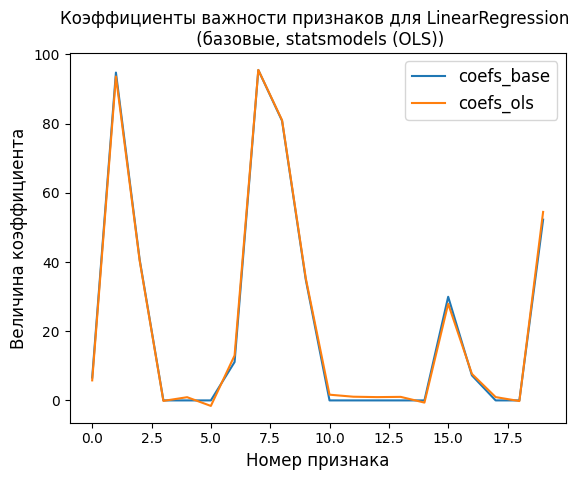

In [29]:
# строим диаграмму распределений значений коэффициентов
# базовой линейной модели
# и вычисленные с помощью statsmodels
df_merged[['coefs_base', 'coefs_ols']].plot()
plt.title('Коэффициенты важности признаков для LinearRegression \n (базовые, statsmodels (OLS))', fontsize = 12)
plt.xlabel('Номер признака', fontsize = 12)
plt.ylabel('Величина коэффициента', fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

По графику мы видим, что модуль statsmodels для LinearRegression в целом правильно (с минимальными отклонениями) определил значимость всех коэффициентов.

Для проверки утвреждения, что у Ridge и Lasso коэффициенты всегда меньше, чем у LinearRegression, построим график.

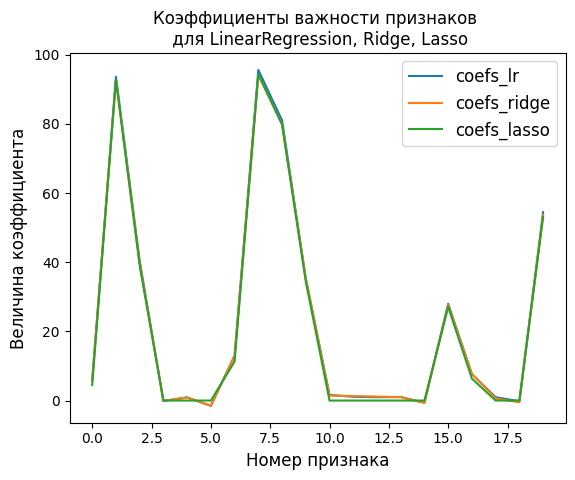

In [30]:
# строим диаграмму распределения значений коэффициентов
# трех обученных моделей
df_merged[[
    'coefs_lr', 'coefs_ridge', 'coefs_lasso'
]].plot()
plt.title('Коэффициенты важности признаков \n для LinearRegression, Ridge, Lasso', fontsize = 12)
plt.xlabel('Номер признака', fontsize = 12)
plt.ylabel('Величина коэффициента', fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

Значения коэффициентов близки настолько, что графики, отражающие величины коэффициентов каждой из обученных моделей практический сливаются. Анализ числовых значений коэффициентов из датасета df_merged опровергает утверждение о том, что у Ridge и Lasso коэффициенты всегда меньше, чем у Linear Regression.

# <font color='green'>**Вопрос 4**<font>

---

**Давайте теперь разберем, как правильно нормировать Х. Изменим немного данные:
X['x5'] = X['x5'] + 5
X['x10'] = X['x10'] + 10
X['x15'] = X['x15'] + 15
(Порядковый номер столбца Х с 0)**

**Разобьем выборку на train - где мы будем обучать регрессию и test - где мы будем проверять качество регрессии:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)**

**В качестве реализации регрессии возьмем Ridge(random_state=1). Метрика качества R2.**

* Нормирование X_train и X_test с помощью StandardScaler, который обучен на X_train, дает лучше результат, по сравнению с отсутствием нормировки, причем значительно (во 2-м знаке)
* Нормирование X_train и X_test с помощью StandardScaler, который обучен на X_train для X_train, и на X_test для X_test, дает хуже результат, чем StandardScaler, который обучен только на X_train, причем значительно (во 2-м знаке)
* Нормирование X_train и X_test с помощью StandardScaler, который обучен на всем X, дает самые лучшие результаты, сравнивая все варианты обучения StandardScaler

In [31]:
# выведем первые пять строк общей статистической сводки
# по ненормированному датасету с признаками
pd.DataFrame(features).describe().T.head()

,count,mean,std,min,25%,50%,75%,max
0,100.0,0.066483,1.029991,-2.896255,-0.534866,-0.028445,0.757704,2.290943
1,100.0,-0.090669,0.977525,-1.975467,-0.857052,-0.076344,0.531959,2.439752
2,100.0,0.148793,0.933608,-2.499406,-0.356271,0.178798,0.721849,2.526932
3,100.0,-0.009252,0.895542,-2.172670,-0.640109,-0.016458,0.564199,2.122156
4,100.0,0.066883,0.927696,-2.423879,-0.496090,0.131194,0.493497,3.137749


In [32]:
# создадим копию датасета с исходными ненормированными признаками
# для выполнения задачи
X = pd.DataFrame(features.copy())

In [33]:
# выведем первые пять строк датасета X
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.922165,1.876796,0.756989,0.279969,0.725767,0.481009,1.355638,-1.244655,0.413435,0.869606,0.654366,-1.125489,2.445752,0.129221,0.223884,1.496044,-0.773789,-0.055585,0.109395,-1.778720
1,-0.083106,-1.457551,-1.406317,-0.160133,-0.796026,1.076007,0.760056,-0.752156,0.082440,-1.504720,-1.875172,0.671340,0.213197,-0.751969,0.021312,1.340450,-0.309209,0.115026,-0.319054,0.319175
2,0.810808,-1.662492,-0.134309,-0.308034,-0.209222,-1.683438,-1.748532,1.126705,1.304340,0.793489,-1.105705,0.779661,1.310309,1.395684,-0.805870,-0.410814,1.032546,-0.214921,-0.562168,-1.090966
3,0.536653,-0.756795,-1.046911,0.455888,0.268592,1.528468,0.718953,1.501334,0.996048,1.185704,1.328194,2.165002,-0.643518,0.927840,0.507836,-0.250833,-1.421811,0.556230,0.057013,-0.322680
4,1.532739,-0.401220,0.519347,1.451144,0.183342,2.189803,0.401712,0.012592,0.690144,-0.108760,0.024510,0.959271,2.153182,-0.767348,-0.808298,-0.773010,0.224092,0.497998,0.872321,0.097676


In [34]:
# изменяем исходные данные
X[4] = X[4] + 5
X[9] = X[9] + 10
X[14] = X[14] + 15

In [35]:
# выведем первые пять строк измененного датасета
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.922165,1.876796,0.756989,0.279969,5.725767,0.481009,1.355638,-1.244655,0.413435,10.869606,0.654366,-1.125489,2.445752,0.129221,15.223884,1.496044,-0.773789,-0.055585,0.109395,-1.778720
1,-0.083106,-1.457551,-1.406317,-0.160133,4.203974,1.076007,0.760056,-0.752156,0.082440,8.495280,-1.875172,0.671340,0.213197,-0.751969,15.021312,1.340450,-0.309209,0.115026,-0.319054,0.319175
2,0.810808,-1.662492,-0.134309,-0.308034,4.790778,-1.683438,-1.748532,1.126705,1.304340,10.793489,-1.105705,0.779661,1.310309,1.395684,14.194130,-0.410814,1.032546,-0.214921,-0.562168,-1.090966
3,0.536653,-0.756795,-1.046911,0.455888,5.268592,1.528468,0.718953,1.501334,0.996048,11.185704,1.328194,2.165002,-0.643518,0.927840,15.507836,-0.250833,-1.421811,0.556230,0.057013,-0.322680
4,1.532739,-0.401220,0.519347,1.451144,5.183342,2.189803,0.401712,0.012592,0.690144,9.891240,0.024510,0.959271,2.153182,-0.767348,14.191702,-0.773010,0.224092,0.497998,0.872321,0.097676


In [36]:
# сохраним целевой признак в DataFrame
y = pd.DataFrame(target)

### **4.1 Обучение модели Ridge на датасетах без нормирования**

---

In [37]:
# формируем обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.33, random_state = 42)

In [38]:
# объявляем модель
ridge = Ridge(random_state = 1)

In [39]:
# обучаем модель
ridge.fit(X_train, y_train)

Ridge(random_state=1)

In [40]:
# получаем предсказания на тестовой выборке
predictions = ridge.predict(X_test)

In [41]:
# вычислим значение r2
r2_1 = round(r2_score(y_test, predictions), 5)

In [42]:
# выведем значение r2
print(r2_1)

0.98983


### **4.2 Нормирование X_train и X_test с помощью StandardScaler, который обучен на X_train**

---

In [43]:
# формируем обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.33, random_state = 42)

In [44]:
# выведем размеры датасетов
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((67, 20), (67, 1), (33, 20), (33, 1))

In [45]:
# объявляем объект StandardScaler
scaler = StandardScaler()

In [46]:
# проверим среднее значение по каждому признаку до скалирования
X_train.mean(axis = 0)

0      0.180680
1     -0.091726
2      0.085171
3      0.085370
4      4.999036
5      0.167871
6     -0.134928
7      0.225905
8     -0.053349
9     10.077252
10    -0.032496
11     0.156415
12     0.028178
13    -0.030231
14    15.094423
15     0.139136
16    -0.003173
17    -0.077871
18     0.007318
19     0.010580
dtype: float64

In [47]:
# обучаем и применяем StandardScaler к датасету X_train
X_train = scaler.fit_transform(X_train)

In [48]:
# проверим, что среднее значение по каждому признаку равно 0
X_train.mean(axis = 0)

array([-3.31409858e-18, -1.15993450e-17, -1.82275422e-17, -3.31409858e-18,
       -2.48557394e-17,  8.49237761e-18, -8.28524645e-19, -2.81698379e-17,
        1.32563943e-17, -1.13740899e-15, -1.49134436e-17,  9.73516458e-18,
        1.65704929e-17,  5.63396759e-17, -2.54522771e-15,  2.98268872e-17,
       -1.86418045e-17,  2.81698379e-17,  6.62819716e-18, -1.32563943e-17])

In [49]:
# применяем StandardScaler к датасету X_test
X_test = scaler.transform(X_test)

In [50]:
# объявляем модель Ridge
ridge = Ridge(random_state = 1)

In [51]:
# обучаем модель
ridge.fit(X_train, y_train)

Ridge(random_state=1)

In [52]:
# получаем предсказания
predictions = ridge.predict(X_test)

In [53]:
# вычислим значение r2
r2_2 = round(r2_score(y_test, predictions), 5)

In [54]:
# выведем значение r2
print(r2_2)

0.98987


### **4.3 Нормирование X_train и X_test с помощью StandardScaler, который обучен на X_train для X_train, и на X_test для X_test**

---

In [55]:
# формируем обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.33, random_state = 42)

In [56]:
# объявляем объект StandardScaler для X_train
scaler_x_train = StandardScaler()

In [57]:
# обучаем и применяем StandardScaler к датасету X_train
X_train = scaler_x_train.fit_transform(X_train)

In [58]:
# объявляем объект StandardScaler для X_test
scaler_x_test = StandardScaler()

In [59]:
# обучаем и применяем StandardScaler к датасету X_test
X_test = scaler_x_test.fit_transform(X_test)

In [60]:
# объявляем модель Ridge
ridge = Ridge(random_state = 1)

In [61]:
# обучаем модель
ridge.fit(X_train, y_train)

Ridge(random_state=1)

In [62]:
# получаем предсказания
predictions = ridge.predict(X_test)

In [63]:
# вычислим значение r2
r2_3 = round(r2_score(y_test, predictions), 5)

In [64]:
# выведем значение r2
print(r2_3)

0.93631


### **4.4 Нормирование X_train и X_test с помощью StandardScaler, который обучен на всем X**

---

In [65]:
# формируем обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.33, random_state = 42)

In [66]:
# объявляем объект StandardScaler для X (полный набор признаков для обучения)
scaler = StandardScaler()

In [67]:
# обучаем StandardScaler на датасете X
scaler.fit(X)

StandardScaler()

In [68]:
# применяем StandardScaler к датасету X_train
X_train = scaler.transform(X_train)

In [69]:
# применяем StandardScaler к датасету X_test
X_test = scaler.transform(X_test)

In [70]:
# объявляем модель Ridge
ridge = Ridge(random_state = 1)

In [71]:
# обучаем модель
ridge.fit(X_train, y_train)

Ridge(random_state=1)

In [72]:
# получаем предсказания
predictions = ridge.predict(X_test)

In [73]:
# вычислим значение r2
r2_4 = round(r2_score(y_test, predictions), 5)

In [74]:
# выведем значение r2
print(r2_4)

0.98974


### **4.5 Результаты обучения**

---

In [75]:
# создаем результирующую таблицу
summary_results = pd.DataFrame(
    {'1': ['Признаки без нормирования', r2_1],
     '2': ['X_train и X_test нормированы на X_train', r2_2],
     '3': ['X_train и X_test нормированы раздельно', r2_3],
     '4': ['X_train и X_test нормированы на Х', r2_4]
     }
)

summary_results = summary_results.T
summary_results.columns = ['Способ нормирования',
                          'Метрика r2']

summary_results = \
    summary_results \
    .sort_values(by = 'Метрика r2',
                 ascending = False) \
    .reset_index(drop = True)

In [76]:
# выведем результирующую таблицу
cm = sns.light_palette('navy',
                       as_cmap = True)

summary_results.style.background_gradient(cmap = cm,
                                          subset = 'Метрика r2',
                                          text_color_threshold = 0.05,
                                          low = 0.4)

,Способ нормирования,Метрика r2
0,X_train и X_test нормированы на X_train,0.989870
1,Признаки без нормирования,0.989830
2,X_train и X_test нормированы на Х,0.989740
3,X_train и X_test нормированы раздельно,0.936310


Нормирование X_train и X_test с помощью StandardScalar, который обучен на X_train для X_train, и на X_test для X_test, дает хуже результат, чем StandardScalar, который обучен только на X_train, причем значительно (во 2-м знаке).

# <font color='green'>**Вопрос 5**<font>

---

**Давайте теперь изменим только X_test (моделируя ситуацию, когда тестовые данные "поплыли"):**

**X_test['x5'] = X_test['x5'] - 2**

**X_test['x10'] = X_test['x10'] - 5**

**X_test['x15'] = X_test['x15'] - 7**

**В качестве реализации регрессии продолжаем с Ridge(random_state=1). Метрика качества R2.**

* Нормирование X_train и X_test с помощью StandardScaler, который обучен на X_train, дает лучше результат, по сравнению с отсутствием нормировки, причем значительно (во 2-м знаке)
* Нормирование X_train и X_test с помощью StandardScaler, который обучен на X_train для X_train, и на X_test для X_test, дает лучше результат, чем StandardScaler, который обучен только на X_train, причем значительно (во 2-м знаке)
* Нормирование X_train и X_test с помощью StandardScaler, который обучен на всем X, дает самые лучшие результаты, сравнивая все варианты обучения StandardScalar
* R2 не может быть меньше 0

In [77]:
# создадим копию датасета с исходными ненормированными признаками
# для выполнения задачи
X = pd.DataFrame(features.copy())

In [78]:
# сохраним целевой признак в DataFrame
y = pd.DataFrame(target)

### **5.1 Обучение модели Ridge на датасетах без нормирования**

---

In [79]:
# формируем обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.33, random_state = 42)

 Изменяем только X_test (моделируя ситуацию, когда тестовые данные 'поплыли').

In [80]:
# изменяем датасет X_test
X_test[4] = X_test[4] - 2
X_test[9] = X_test[9] - 5
X_test[14] = X_test[14] - 7

In [81]:
# объявляем модель
ridge = Ridge(random_state = 1)

In [82]:
# обучаем модель
ridge.fit(X_train, y_train)

Ridge(random_state=1)

In [83]:
# получаем предсказания на тестовой выборке
predictions = ridge.predict(X_test)

In [84]:
# вычислим значение r2
r2_1 = round(r2_score(y_test, predictions), 5)

In [85]:
# выведем значение r2
print(r2_1)

-0.46233


### **5.2 Нормирование X_train и X_test с помощью StandardScaler, который обучен на X_train**

---

In [86]:
# формируем обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.33, random_state = 42)

In [87]:
# изменяем датасет X_test
X_test[4] = X_test[4] - 2
X_test[9] = X_test[9] - 5
X_test[14] = X_test[14] - 7

In [88]:
# объявляем объект StandardScaler
scaler = StandardScaler()

In [89]:
# обучаем и применяем StandardScaler к датасету X_train
X_train = scaler.fit_transform(X_train)

In [90]:
# применяем StandardScaler к датасету X_test
X_test = scaler.transform(X_test)

In [91]:
# объявляем модель Ridge
ridge = Ridge(random_state = 1)

In [92]:
# обучаем модель
ridge.fit(X_train, y_train)

Ridge(random_state=1)

In [93]:
# получаем предсказания
predictions = ridge.predict(X_test)

In [94]:
# вычислим значение r2
r2_2 = round(r2_score(y_test, predictions), 5)

In [95]:
# выведем значение r2
print(r2_2)

-0.4411


### **5.3 Нормирование X_train и X_test с помощью StandardScaler, который обучен на X_train для X_train, и на X_test для X_test**

---

In [96]:
# формируем обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.33, random_state = 42)

In [97]:
# изменяем датасет X_test
X_test[4] = X_test[4] - 2
X_test[9] = X_test[9] - 5
X_test[14] = X_test[14] - 7

In [98]:
# объявляем объект StandardScaler для X_train
scaler_x_train = StandardScaler()

In [99]:
# обучаем и применяем StandardScaler к датасету X_train
X_train = scaler_x_train.fit_transform(X_train)

In [100]:
# объявляем объект StandardScaler для X_test
scaler_x_test = StandardScaler()

In [101]:
# обучаем и применяем StandardScaler к датасету X_test
X_test = scaler_x_test.fit_transform(X_test)

In [102]:
# объявляем модель Ridge
ridge = Ridge(random_state = 1)

In [103]:
# обучаем модель
ridge.fit(X_train, y_train)

Ridge(random_state=1)

In [104]:
# получаем предсказания
predictions = ridge.predict(X_test)

In [105]:
# вычислим значение r2
r2_3 = round(r2_score(y_test, predictions), 5)

In [106]:
# выведем значение r2
print(r2_3)

0.93631


### **5.4 Нормирование X_train и X_test с помощью StandardScaler, который обучен на всем X**

---

In [107]:
# формируем обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.33, random_state = 42)

In [108]:
# изменяем датасет X_test
X_test[4] = X_test[4] - 2
X_test[9] = X_test[9] - 5
X_test[14] = X_test[14] - 7

In [109]:
# объявляем объект StandardScaler для X (полный набор признаков для обучения)
scaler = StandardScaler()

In [110]:
# обучаем StandardScaler на датасете X
scaler.fit(X)

StandardScaler()

In [111]:
# применяем StandardScaler к датасету X_train
X_train = scaler.transform(X_train)

In [112]:
# применяем StandardScaler к датасету X_test
X_test = scaler.transform(X_test)

In [113]:
# объявляем модель Ridge
ridge = Ridge(random_state = 1)

In [114]:
# обучаем модель
ridge.fit(X_train, y_train)

Ridge(random_state=1)

In [115]:
# получаем предсказания
predictions = ridge.predict(X_test)

In [116]:
# вычислим значение r2
r2_4 = round(r2_score(y_test, predictions), 5)

In [117]:
# выведем значение r2
print(r2_4)

-0.45243


### **5.5 Результаты обучения**

---

In [118]:
# создаем результирующую таблицу
summary_results = pd.DataFrame(
    {'1': ['Признаки без нормирования', r2_1],
     '2': ['X_train и X_test нормированы на X_train', r2_2],
     '3': ['X_train и X_test нормированы раздельно', r2_3],
     '4': ['X_train и X_test нормированы на Х', r2_4]
     }
)

summary_results = summary_results.T
summary_results.columns = ['Способ нормирования',
                          'Метрика r2']

summary_results = \
    summary_results \
    .sort_values(by = 'Метрика r2',
                 ascending = False) \
    .reset_index(drop = True)

In [119]:
# выведем результирующую таблицу
cm = sns.light_palette('steelblue',
                       as_cmap = True)

summary_results.style.background_gradient(cmap = cm,
                                          subset = 'Метрика r2',
                                          text_color_threshold = 0.30,
                                          low = 0.9)

,Способ нормирования,Метрика r2
0,X_train и X_test нормированы раздельно,0.936310
1,X_train и X_test нормированы на X_train,-0.441100
2,X_train и X_test нормированы на Х,-0.452430
3,Признаки без нормирования,-0.462330


Метрика R2 может быть отрицательна, если модель плохо соответствует тренду данных. Это определено в документации sklearn.

Нормирование X_train и X_test с помощью StandardScaler, который обучен на X_train, дает лучше результат, по сравнению с отсутствием нормировки, причем значительно (во 2-м знаке).

Нормирование X_train и X_test с помощью StandardScaler, который обучен на X_train для X_train, и на X_test для X_test, дает лучше результат, чем StandardScalar, который обучен только на X_train, причем значительно (во 2-м знаке)

# <font color='green'>**Вопрос 6**<font>

---

**Давайте теперь изменим X_test и X_train следующим образом:**

**X_train['x5'] = X_train['x5'] * 2.5**

**X_train['x10'] = X_train['x10'] * 5.5**

**X_train['x15'] = X_train['x15'] * 7.7**


**X_test['x5'] = X_test['x5'] * 2 + 0.5**

**X_test['x10'] = X_test['x10'] * 5 + 1**

**X_test['x15'] = X_test['x15'] * 7 + 1.5**

**В качестве реализации регрессии продолжаем с Ridge(random_state=1). Метрика качества R2.**

* Нормирование X_train и X_test с помощью StandardScaler, который обучен на X_train, дает лучше результат, по сравнению с отсутствием нормировки, причем значительно (во 2-м знаке)
* Нормирование X_train и X_test с помощью StandardScaler, который обучен на X_train для X_train, и на X_test для X_test, дает хуже результат, чем StandardScalar, который обучен только на X_train, причем значительно (в 2-м знаке)
* Нормирование X_train и X_test с помощью StandardScaler, который обучен на всем X, дает самые лучшие результаты, сравнивая все варианты обучения StandardScalar

In [120]:
# создадим копию датасета с исходными ненормированными признаками
# для выполнения задачи
X = pd.DataFrame(features.copy())

In [121]:
# сохраним целевой признак в DataFrame
y = pd.DataFrame(target)

### **6.1 Обучение модели Ridge на датасетах без нормирования**

---

In [122]:
# формируем обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.33, random_state = 42)

In [123]:
# Изменяем датасет X_train
X_train[4] = X_train[4] * 2.5
X_train[9] = X_train[9] * 5.5
X_train[14] = X_train[14] * 7.7

# изменяем датасет X_test
X_test[4] = X_test[4] * 2 + 0.5
X_test[9] = X_test[9] * 5 + 1
X_test[14] = X_test[14] * 7 + 1.5

In [124]:
# объявляем модель
ridge = Ridge(random_state = 1)

In [125]:
# обучаем модель
ridge.fit(X_train, y_train)

Ridge(random_state=1)

In [126]:
# получаем предсказания на тестовой выборке
predictions = ridge.predict(X_test)

In [127]:
# вычислим значение r2
r2_1 = round(r2_score(y_test, predictions), 5)

In [128]:
# выведем значение r2
print(r2_1)

0.98194


### **6.2 Нормирование X_train и X_test с помощью StandardScaler, который обучен на X_train**

---

In [129]:
# формируем обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.33, random_state = 42)

In [130]:
# Изменяем датасет X_train
X_train[4] = X_train[4] * 2.5
X_train[9] = X_train[9] * 5.5
X_train[14] = X_train[14] * 7.7

# изменяем датасет X_test
X_test[4] = X_test[4] * 2 + 0.5
X_test[9] = X_test[9] * 5 + 1
X_test[14] = X_test[14] * 7 + 1.5

In [131]:
# объявляем объект StandardScaler
scaler = StandardScaler()

In [132]:
# обучаем и применяем StandardScaler к датасету X_train
X_train = scaler.fit_transform(X_train)

In [133]:
# применяем StandardScaler к датасету X_test
X_test = scaler.transform(X_test)

In [134]:
# объявляем модель Ridge
ridge = Ridge(random_state = 1)

In [135]:
# обучаем модель
ridge.fit(X_train, y_train)

Ridge(random_state=1)

In [136]:
# получаем предсказания
predictions = ridge.predict(X_test)

In [137]:
# вычислим значение r2
r2_2 = round(r2_score(y_test, predictions), 5)

In [138]:
# выведем значение r2
print(r2_2)

0.98171


### **6.3 Нормирование X_train и X_test с помощью StandardScaler, который обучен на X_train для X_train, и на X_test для X_test**

---

In [139]:
# формируем обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.33, random_state = 42)

In [140]:
# Изменяем датасет X_train
X_train[4] = X_train[4] * 2.5
X_train[9] = X_train[9] * 5.5
X_train[14] = X_train[14] * 7.7

# изменяем датасет X_test
X_test[4] = X_test[4] * 2 + 0.5
X_test[9] = X_test[9] * 5 + 1
X_test[14] = X_test[14] * 7 + 1.5

In [141]:
# объявляем объект StandardScaler для X_train
scaler_x_train = StandardScaler()

In [142]:
# обучаем и применяем StandardScaler к датасету X_train
X_train = scaler_x_train.fit_transform(X_train)

In [143]:
# объявляем объект StandardScaler для X_test
scaler_x_test = StandardScaler()

In [144]:
# обучаем и применяем StandardScaler к датасету X_test
X_test = scaler_x_test.fit_transform(X_test)

In [145]:
# объявляем модель Ridge
ridge = Ridge(random_state = 1)

In [146]:
# обучаем модель
ridge.fit(X_train, y_train)

Ridge(random_state=1)

In [147]:
# получаем предсказания
predictions = ridge.predict(X_test)

In [148]:
# вычислим значение r2
r2_3 = round(r2_score(y_test, predictions), 5)

In [149]:
# выведем значение r2
print(r2_3)

0.93631


### **6.4 Нормирование X_train и X_test с помощью StandardScaler, который обучен на всем X**

---

In [150]:
# формируем обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.33, random_state = 42)

In [151]:
# Изменяем датасет X_train
X_train[4] = X_train[4] * 2.5
X_train[9] = X_train[9] * 5.5
X_train[14] = X_train[14] * 7.7

# изменяем датасет X_test
X_test[4] = X_test[4] * 2 + 0.5
X_test[9] = X_test[9] * 5 + 1
X_test[14] = X_test[14] * 7 + 1.5

In [152]:
# объявляем объект StandardScaler для X (полный набор признаков для обучения)
scaler = StandardScaler()

In [153]:
# обучаем StandardScaler на датасете X
scaler.fit(X)

StandardScaler()

In [154]:
# применяем StandardScaler к датасету X_train
X_train = scaler.transform(X_train)

In [155]:
# применяем StandardScaler к датасету X_test
X_test = scaler.transform(X_test)

In [156]:
# объявляем модель Ridge
ridge = Ridge(random_state = 1)

In [157]:
# обучаем модель
ridge.fit(X_train, y_train)

Ridge(random_state=1)

In [158]:
# получаем предсказания
predictions = ridge.predict(X_test)

In [159]:
# вычислим значение r2
r2_4 = round(r2_score(y_test, predictions), 5)

In [160]:
# выведем значение r2
print(r2_4)

0.98188


### **6.5 Результаты обучения**

---

In [161]:
# создаем результирующую таблицу
summary_results = pd.DataFrame(
    {'1': ['Признаки без нормирования', r2_1],
     '2': ['X_train и X_test нормированы на X_train', r2_2],
     '3': ['X_train и X_test нормированы раздельно', r2_3],
     '4': ['X_train и X_test нормированы на Х', r2_4]
     }
)

summary_results = summary_results.T
summary_results.columns = ['Способ нормирования',
                          'Метрика r2']

summary_results = \
    summary_results \
    .sort_values(by = 'Метрика r2',
                 ascending = False) \
    .reset_index(drop = True)

In [162]:
# выведем результирующую таблицу
cm = sns.light_palette('teal',
                       as_cmap = True)

summary_results.style.background_gradient(cmap = cm,
                                          subset = 'Метрика r2',
                                          text_color_threshold = 0.30,
                                          low = 0.9)

,Способ нормирования,Метрика r2
0,Признаки без нормирования,0.981940
1,X_train и X_test нормированы на Х,0.981880
2,X_train и X_test нормированы на X_train,0.981710
3,X_train и X_test нормированы раздельно,0.936310


# <font color='green'>**Вопрос 7**<font>

---

**Работаем с датасетом, определенном в вопросе 4 (где 5й,10й,15й признаки увеличены). Разобьём на трейн и тест как в вопросе 4. Используем нормированные признаки и Ridge(random_state=1):**

**Теперь давайте сделаем пропущенные значения для важного признака:
X_train.loc[X_train['x1'].isin(X_train['x1'].sample(smpl, random_state=1+exp)), 'x1'] = np.nan,
где попробуем 5 вариантов случайности exp = range(5). smpl - кол-во пропущенных значений.**

**Ответьте на вопросы 1-2.**

**Потом сделаем пропущенные значения только для неважного признака:
X_train.loc[X_train['x10'].isin(X_train['x10'].sample(smpl, random_state=1+exp)), 'x10'] = np.nan,
где попробуем 5 вариантов случайности exp = range(5).**

**Ответьте на вопросы 3-4.**

* При 0-60% пропущенных значений, заполнение средним по x1 работает лучше для важного признака, чем отбрасывание наблюдений с пропущенными значениями
* Для 70-90% пропущенных значений, заполнение средним по x1 работает лучше для важного признака, чем отбрасывание наблюдений с пропущенными значениями
* При 0-60% пропущенных значений, заполнение средним по x10 работает в среднем лучше для неважного признака, чем отбрасывание наблюдений с пропущенными значениями
* Для 70-90% пропущенных значений, заполнение средним по x10 работает лучше для неважного признака, чем отбрасывание наблюдений с пропущенными значениями

In [163]:
# создадим копию датасета с исходными ненормированными признаками
# для выполнения задачи
X = pd.DataFrame(features.copy())

In [164]:
# изменяем исходные данные
X[4] = X[4] + 5
X[9] = X[9] + 10
X[14] = X[14] + 15

In [165]:
# сохраним целевой признак в DataFrame
y = pd.DataFrame(target)

In [166]:
# выведем значение коэффициента для 1-го признака
coef_1 = round(coefs[0], 4)
coef_1

6.601

In [167]:
# выведем значение коэффициента для 10-го признака
coef_10 = round(coefs[9], 4)
coef_10

34.8821

## **7.1 Заполнение пропущенных значений для важного признака**

---

### **7.1.1 Количество пропусков 0-60%**

---

Обучим модель, **удалив все наблюдения с пропущенными значениями**.

In [168]:
# формируем обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.33, random_state = 42)

In [169]:
# объявляем объект StandardScaler
scaler = StandardScaler()

In [170]:
# обучаем и применяем StandardScaler к датасету X_train
X_train = scaler.fit_transform(X_train)

In [171]:
# применяем StandardScaler к датасету X_test
X_test = scaler.transform(X_test)

In [172]:
# сохраним обучающие признаки в DataFrame
X_train = pd.DataFrame(X_train)

In [173]:
# создадим пропуски в диапазоне 0-60% от общего числа значений
X_train.loc[X_train[0].isin(X_train[0].sample(30, random_state=1)), 0] = np.nan

In [174]:
# проверим наличие пропусков в признаке X_train[0] в %
round(X_train[0].isna().sum() / X_train.shape[0], 4) * 100

44.78

In [175]:
# сбрасываем индексы
X_train.reset_index(drop = True, inplace = True)

# выведем новые значения индексов
X_train.index

RangeIndex(start=0, stop=67, step=1)

In [176]:
# сбрасываем индексы
y_train.reset_index(drop = True, inplace = True)

# выведем новые значения индексов
y_train.index

RangeIndex(start=0, stop=67, step=1)

In [177]:
# удаляем их X_train строки с пропусками в признаке [0]
X_train.dropna(inplace = True)
X_train.shape

(37, 20)

In [178]:
# отфильтруем из датасета y_train только строки,
# соответствующие строкам датасета X_train
y_train = y_train.loc[y_train.index.intersection(X_train.index)]
y_train.shape

(37, 1)

In [179]:
# объявим модель
ridge = Ridge(random_state = 1)

In [180]:
# обучаем модель
ridge.fit(X_train, y_train)

Ridge(random_state=1)

In [181]:
# получим значение коэффициента признака
round(ridge.coef_[0, 0], 4)

6.205

Обучим модель, **заполнив все пропуски средним значением**.

In [182]:
# формируем обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.33, random_state = 42)

In [183]:
# объявляем объект StandardScaler
scaler = StandardScaler()

In [184]:
# обучаем и применяем StandardScaler к датасету X_train
X_train = scaler.fit_transform(X_train)

In [185]:
# применяем StandardScaler к датасету X_test
X_test = scaler.transform(X_test)

In [186]:
# сохраним обучающие признаки в DataFrame
X_train = pd.DataFrame(X_train)

In [187]:
# создадим пропуски в диапазоне 0-60% от общего числа значений
X_train.loc[X_train[0].isin(X_train[0].sample(30, random_state=1)), 0] = np.nan

In [188]:
# проверим наличие пропусков в признаке X_train[0] в %
round(X_train[0].isna().sum() / X_train.shape[0], 4) * 100

44.78

In [189]:
# объявляем объект SimpleImputer
# для заполнения пропусков средним значением
imputer = SimpleImputer(
    missing_values = np.nan,
    strategy = 'mean')

In [190]:
# заполняем пропуски
X_train = imputer.fit_transform(X_train)

In [191]:
pd.DataFrame(X_train)[0].isna().sum()

0

In [192]:
# обучаем модель
ridge.fit(X_train, y_train)

Ridge(random_state=1)

In [193]:
# получим значение коэффициента признака
round(ridge.coef_[0, 0], 4)

5.0592

Вывод: при 0-60% пропущенных значений, заполнение средним по 1-му признаку работает хуже для важного признака, чем отбрасывание наблюдений с пропущенными значениями.

### **7.1.2 Количество пропусков 70-90%**

---

Обучим модель, **удалив все наблюдения с пропущенными значениями**.

In [194]:
# формируем обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.33, random_state = 42)

In [195]:
# объявляем объект StandardScaler
scaler = StandardScaler()

In [196]:
# обучаем и применяем StandardScaler к датасету X_train
X_train = scaler.fit_transform(X_train)

In [197]:
# применяем StandardScaler к датасету X_test
X_test = scaler.transform(X_test)

In [198]:
# сохраним обучающие признаки в DataFrame
X_train = pd.DataFrame(X_train)

In [199]:
# создадим пропуски в диапазоне 0-60% от общего числа значений
X_train.loc[X_train[0].isin(X_train[0].sample(55, random_state=1)), 0] = np.nan

In [200]:
# проверим наличие пропусков в признаке X_train[0] в %
round(X_train[0].isna().sum() / X_train.shape[0], 4) * 100

82.09

In [201]:
# сбрасываем индексы
X_train.reset_index(drop = True, inplace = True)

# выведем новые значения индексов
X_train.index

RangeIndex(start=0, stop=67, step=1)

In [202]:
# сбрасываем индексы
y_train.reset_index(drop = True, inplace = True)

# выведем новые значения индексов
y_train.index

RangeIndex(start=0, stop=67, step=1)

In [203]:
# удаляем их X_train строки с пропусками в признаке [0]
X_train.dropna(inplace = True)
X_train.shape

(12, 20)

In [204]:
# отфильтруем из датасета y_train только строки,
# соответствующие строкам датасета X_train
y_train = y_train.loc[y_train.index.intersection(X_train.index)]
y_train.shape

(12, 1)

In [205]:
# объявим модель
ridge = Ridge(random_state = 1)

In [206]:
# обучаем модель
ridge.fit(X_train, y_train)

Ridge(random_state=1)

In [207]:
# получим значение коэффициента признака
round(ridge.coef_[0, 0], 4)

-2.7167

Обучим модель, **заполнив все пропуски средним значением**.

In [208]:
# формируем обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.33, random_state = 42)

In [209]:
# объявляем объект StandardScaler
scaler = StandardScaler()

In [210]:
# обучаем и применяем StandardScaler к датасету X_train
X_train = scaler.fit_transform(X_train)

In [211]:
# применяем StandardScaler к датасету X_test
X_test = scaler.transform(X_test)

In [212]:
# сохраним обучающие признаки в DataFrame
X_train = pd.DataFrame(X_train)

In [213]:
# создадим пропуски в диапазоне 70-90% от общего числа значений
X_train.loc[X_train[0].isin(X_train[0].sample(55, random_state=1)), 0] = np.nan

In [214]:
# проверим наличие пропусков в признаке X_train[0] в %
round(X_train[0].isna().sum() / X_train.shape[0], 4) * 100

82.09

In [215]:
# объявляем объект SimpleImputer
# для заполнения пропусков средним значением
imputer = SimpleImputer(
    missing_values = np.nan,
    strategy = 'mean')

In [216]:
# заполняем пропуски
X_train = imputer.fit_transform(X_train)

In [217]:
pd.DataFrame(X_train)[0].isna().sum()

0

In [218]:
# обучаем модель
ridge.fit(X_train, y_train)

Ridge(random_state=1)

In [219]:
# получим значение коэффициента признака
round(ridge.coef_[0, 0], 4)

3.3592

Вывод: для 70-90% пропущенных значений, заполнение средним по x1 работает лучше для важного признака, чем отбрасывание наблюдений с пропущенными значениями.

## **7.2 Заполнение пропущенных значений для неважного признака**

---

### **7.2.1 Количество пропусков 0-60%**

---

Обучим модель, **удалив все наблюдения с пропущенными значениями**.

In [220]:
# формируем обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.33, random_state = 42)

In [221]:
# объявляем объект StandardScaler
scaler = StandardScaler()

In [222]:
# обучаем и применяем StandardScaler к датасету X_train
X_train = scaler.fit_transform(X_train)

In [223]:
# применяем StandardScaler к датасету X_test
X_test = scaler.transform(X_test)

In [224]:
# сохраним обучающие признаки в DataFrame
X_train = pd.DataFrame(X_train)

In [225]:
# создадим пропуски в диапазоне 0-60% от общего числа значений
X_train.loc[X_train[9].isin(X_train[9].sample(30, random_state=1)), 9] = np.nan

In [226]:
# проверим наличие пропусков в признаке X_train[9] в %
round(X_train[9].isna().sum() / X_train.shape[0], 4) * 100

44.78

In [227]:
# сбрасываем индексы
X_train.reset_index(drop = True, inplace = True)

# выведем новые значения индексов
X_train.index

RangeIndex(start=0, stop=67, step=1)

In [228]:
# сбрасываем индексы
y_train.reset_index(drop = True, inplace = True)

# выведем новые значения индексов
y_train.index

RangeIndex(start=0, stop=67, step=1)

In [229]:
# удаляем их X_train строки с пропусками в признаке [9]
X_train.dropna(inplace = True)
X_train.shape

(37, 20)

In [230]:
# отфильтруем из датасета y_train только строки,
# соответствующие строкам датасета X_train
y_train = y_train.loc[y_train.index.intersection(X_train.index)]
y_train.shape

(37, 1)

In [231]:
# объявим модель
ridge = Ridge(random_state = 1)

In [232]:
# обучаем модель
ridge.fit(X_train, y_train)

Ridge(random_state=1)

In [233]:
# получим значение коэффициента признака
round(ridge.coef_[0, 9], 4)

39.0668

Обучим модель, **заполнив все пропуски средним значением**.

In [234]:
# формируем обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.33, random_state = 42)

In [235]:
# объявляем объект StandardScaler
scaler = StandardScaler()

In [236]:
# обучаем и применяем StandardScaler к датасету X_train
X_train = scaler.fit_transform(X_train)

In [237]:
# применяем StandardScaler к датасету X_test
X_test = scaler.transform(X_test)

In [238]:
# сохраним обучающие признаки в DataFrame
X_train = pd.DataFrame(X_train)

In [239]:
# создадим пропуски в диапазоне 0-60% от общего числа значений
X_train.loc[X_train[9].isin(X_train[9].sample(30, random_state=1)), 9] = np.nan

In [240]:
# проверим наличие пропусков в признаке X_train[9] в %
round(X_train[9].isna().sum() / X_train.shape[0], 4) * 100

44.78

In [241]:
# объявляем объект SimpleImputer
# для заполнения пропусков средним значением
imputer = SimpleImputer(
    missing_values = np.nan,
    strategy = 'mean')

In [242]:
# заполняем пропуски
X_train = imputer.fit_transform(X_train)

In [243]:
pd.DataFrame(X_train)[0].isna().sum()

0

In [244]:
# обучаем модель
ridge.fit(X_train, y_train)

Ridge(random_state=1)

In [245]:
# получим значение коэффициента признака
round(ridge.coef_[0, 9], 4)

36.95

Вывод: при 0-60% пропущенных значений, заполнение средним по 9-му работает хуже для неважного признака, чем отбрасывание наблюдений с пропущенными значениями.

### **7.1.2 Количество пропусков 70-90%**

---

Обучим модель, **удалив все наблюдения с пропущенными значениями**.

In [246]:
# формируем обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.33, random_state = 42)

In [247]:
# объявляем объект StandardScaler
scaler = StandardScaler()

In [248]:
# обучаем и применяем StandardScaler к датасету X_train
X_train = scaler.fit_transform(X_train)

In [249]:
# применяем StandardScaler к датасету X_test
X_test = scaler.transform(X_test)

In [250]:
# сохраним обучающие признаки в DataFrame
X_train = pd.DataFrame(X_train)

In [251]:
# создадим пропуски в диапазоне 70-90% от общего числа значений
X_train.loc[X_train[9].isin(X_train[9].sample(55, random_state=1)), 9] = np.nan

In [252]:
# проверим наличие пропусков в признаке X_train[9] в %
round(X_train[9].isna().sum() / X_train.shape[0], 4) * 100

82.09

In [253]:
# сбрасываем индексы
X_train.reset_index(drop = True, inplace = True)

# выведем новые значения индексов
X_train.index

RangeIndex(start=0, stop=67, step=1)

In [254]:
# сбрасываем индексы
y_train.reset_index(drop = True, inplace = True)

# выведем новые значения индексов
y_train.index

RangeIndex(start=0, stop=67, step=1)

In [255]:
# удаляем их X_train строки с пропусками в признаке [9]
X_train.dropna(inplace = True)
X_train.shape

(12, 20)

In [256]:
# отфильтруем из датасета y_train только строки,
# соответствующие строкам датасета X_train
y_train = y_train.loc[y_train.index.intersection(X_train.index)]
y_train.shape

(12, 1)

In [257]:
# объявим модель
ridge = Ridge(random_state = 1)

In [258]:
# обучаем модель
ridge.fit(X_train, y_train)

Ridge(random_state=1)

In [259]:
# получим значение коэффициента признака
round(ridge.coef_[0, 9], 4)

40.7513

Обучим модель, **заполнив все пропуски средним значением**.

In [260]:
# формируем обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.33, random_state = 42)

In [261]:
# объявляем объект StandardScaler
scaler = StandardScaler()

In [262]:
# обучаем и применяем StandardScaler к датасету X_train
X_train = scaler.fit_transform(X_train)

In [263]:
# применяем StandardScaler к датасету X_test
X_test = scaler.transform(X_test)

In [264]:
# сохраним обучающие признаки в DataFrame
X_train = pd.DataFrame(X_train)

In [265]:
# создадим пропуски в диапазоне 0-60% от общего числа значений
X_train.loc[X_train[9].isin(X_train[9].sample(55, random_state=1)), 9] = np.nan

In [266]:
# проверим наличие пропусков в признаке X_train[9] в %
round(X_train[9].isna().sum() / X_train.shape[0], 4) * 100

82.09

In [267]:
# объявляем объект SimpleImputer
# для заполнения пропусков средним значением
imputer = SimpleImputer(
    missing_values = np.nan,
    strategy = 'mean')

In [268]:
# заполняем пропуски
X_train = imputer.fit_transform(X_train)

In [269]:
pd.DataFrame(X_train)[0].isna().sum()

0

In [270]:
# обучаем модель
ridge.fit(X_train, y_train)

Ridge(random_state=1)

In [271]:
# получим значение коэффициента признака
round(ridge.coef_[0, 9], 4)

33.042

Вывод: для 70-90% пропущенных значений, заполнение средним по 9-му признаку работает хуже для неважного признака, чем отбрасывание наблюдений с пропущенными значениями.

# <font color='green'>**Вопрос 8**<font>

---

**Вопросы 4-6 были про правильное нормирование. Вопрос 7 был про заполнение пропусков.
Подведем итоги экспериментов. Какие выводы можно сделать?**

* Лучше всегда нормировать при применении регуляризации
* Если мы предполагаем, что распределение X_test (данные, на которых мы будем применять модель) может измениться, то лучше отдельно обучать и применять StandardScalar для train и отдельно обучать и применять для test
* Заполнение пропусков средним работает всегда
* Если признак важный, а доля пропущенных значений невелика, то лучше наблюдения с пропущенными значениями просто отбросить

# <font color='green'>**Вопрос 9**<font>

---

**Создадим данные, используя
X, y, coefs = make_regression(n_samples=1000, n_features=200, noise=10, random_state=42, coef=True)**

**Давайте построим Ridge(random_state=1), Lasso, LinearRegression на ненормированных данных (т.к. сырые данные близки к нормированным) и на 100 случайно выбранных наблюдениях. Качество оценим по mean_squared_error от истинных значений и предсказаний на наблюдениях, которые не участвовали в обучении (900).**

* Самая лучшая регрессия – LinearRegression
* Самая лучшая регрессия – Ridge
* Самая лучшая регрессия – Lasso
* Самые близкие к истинным значения коэффициентов у Linear Regression, если оценить по методу вопроса 3
* Самые близкие к истинным значения коэффициентов у Lasso, если оценить по методу вопроса 3
* При количестве наблюдений меньше, чем количество признаков, Lasso может помочь
* Регрессию можно использовать при любом соотношении количества признаков и наблюдений

In [272]:
# создадим исходные данные
X, y, coefs = make_regression(
    n_samples=1000,
    n_features=200,
    noise=10,
    random_state=42,
    coef=True)

In [273]:
# сохраним np.array X и y в DataFrame
X = pd.DataFrame(X)
y = pd.DataFrame(y)

In [274]:
# сформируем из признаков выборку из 100 случайных значений
X_100 = X.sample(100, random_state=1)

In [275]:
# выведем размер выборки с признаками
X_100.shape

(100, 200)

In [276]:
# отфильтруем для y_100 наблюдения из X_100 по индексам
y_100 = y.loc[y.index.intersection(X_100.index)]
y_100.shape

(100, 1)

## **9.1 Обучение модели LinearRegression**

---

### **9.1.1 Обучение модели LinearRegression на полных данных**

---

In [277]:
# формируем обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.33, random_state = 42)

In [278]:
# объявляем модель
lr_full = LinearRegression()

In [279]:
# обучаем модель на полных данных
lr_full.fit(X_train, y_train)

LinearRegression()

In [280]:
# получаем предсказания модели
predictions = lr_full.predict(X_test)

In [281]:
# вычислим значение метрики mse
mse_lr_full = round(mean_squared_error(y_test, predictions), 3)

# выведем значение метрики mse
print(mse_lr_full)

129.787


### **9.1.2 Обучение модели LinearRegression на выборочных данных**

---

In [282]:
# формируем обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(
    X_100, y_100, test_size = 0.33, random_state = 42)

In [283]:
# объявляем модель
lr_sample = LinearRegression()

In [284]:
# обучаем модель на полных данных
lr_sample.fit(X_train, y_train)

LinearRegression()

In [285]:
# получаем предсказания модели
predictions = lr_sample.predict(X_test)

In [286]:
# вычислим значение метрики mse
mse_lr_sample = round(mean_squared_error(y_test, predictions), 3)

# выведем значение метрики mse
print(mse_lr_sample)

59963.798


## **9.2 Обучение модели Ridge**

---

### **9.2.1 Обучение модели Ridge на полных данных**

---

In [287]:
# формируем обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.33, random_state = 42)

In [288]:
# объявляем модель
ridge_full = Ridge(random_state = 1)

In [289]:
# обучаем модель на полных данных
ridge_full.fit(X_train, y_train)

Ridge(random_state=1)

In [290]:
# получаем предсказания модели
predictions = ridge_full.predict(X_test)

In [291]:
# вычислим значение метрики mse
mse_ridge_full = round(mean_squared_error(y_test, predictions), 3)

# выведем значение метрики mse
print(mse_ridge_full)

128.674


### **9.2.2 Обучение модели Ridge на выборочных данных**

---

In [292]:
# формируем обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(
    X_100, y_100, test_size = 0.33, random_state = 42)

In [293]:
# объявляем модель
ridge_sample = Ridge(random_state = 1)

In [294]:
# обучаем модель на полных данных
ridge_sample.fit(X_train, y_train)

Ridge(random_state=1)

In [295]:
# получаем предсказания модели
predictions = ridge_sample.predict(X_test)

In [296]:
# вычислим значение метрики mse
mse_ridge_sample = round(mean_squared_error(y_test, predictions), 3)

# выведем значение метрики mse
print(mse_ridge_sample)

59611.517


## **9.3 Обучение модели Lasso**

---

### **9.3.1 Обучение модели Lasso на полных данных**

---

In [297]:
# формируем обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.33, random_state = 42)

In [298]:
# объявляем модель
lasso_full = Lasso(random_state = 1)

In [299]:
# обучаем модель на полных данных
lasso_full.fit(X_train, y_train)

Lasso(random_state=1)

In [300]:
# получаем предсказания модели
predictions = lasso_full.predict(X_test)

In [301]:
# вычислим значение метрики mse
mse_lasso_full = round(mean_squared_error(y_test, predictions), 3)

# выведем значение метрики mse
print(mse_lasso_full)

102.643


### **9.3.2 Обучение модели Lasso на выборочных данных**

---

In [302]:
# формируем обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(
    X_100, y_100, test_size = 0.33, random_state = 42)

In [303]:
# объявляем модель
lasso_sample = Lasso(random_state = 1)

In [304]:
# обучаем модель на полных данных
lasso_sample.fit(X_train, y_train)

Lasso(random_state=1)

In [305]:
# получаем предсказания модели
predictions = lasso_sample.predict(X_test)

In [306]:
# вычислим значение метрики mse
mse_lasso_sample = round(mean_squared_error(y_test, predictions), 3)

# выведем значение метрики mse
print(mse_lasso_sample)

70487.889


## **9.4 Сводные результаты обучения модели**

---

In [307]:
# создаем результирующую таблицу
summary_results = pd.DataFrame(
    {'1': ['Linear_regression (full)', mse_lr_full],
     '2': ['Linear_regression (sample)', mse_lr_sample],
     '3': ['Ridge (full)', mse_ridge_full],
     '4': ['Ridge (sample)', mse_ridge_sample],
     '5': ['Lasso (full)', mse_lasso_full],
     '6': ['Lasso (sample)', mse_lasso_sample]
     }
)

summary_results = summary_results.T
summary_results.columns = ['Модель',
                          'Метрика mse']

summary_results = \
    summary_results \
    .sort_values(by = 'Метрика mse',
                 ascending = True) \
    .reset_index(drop = True)

In [308]:
# выведем результирующую таблицу
cm = sns.light_palette('red',
                       as_cmap = True)

summary_results.style.background_gradient(cmap = cm,
                                          subset = 'Метрика mse',
                                          text_color_threshold = 0.05,
                                          low = 0.4)

,Модель,Метрика mse
0,Lasso (full),102.643000
1,Ridge (full),128.674000
2,Linear_regression (full),129.787000
3,Ridge (sample),59611.517000
4,Linear_regression (sample),59963.798000
5,Lasso (sample),70487.889000


На полных данных лучшее (самое низкое) значение метрики mse показывает модель Lasso.

На выборке 10% случайных наблюдений лучший результат показала модель Ridge.

## **9.5 Оценка близости коэффициентов обученных моделей к истинным значениям коэффициентов**

---


In [309]:
# сохраним значения коэффициентов в датафреймы
coefs_base = pd.DataFrame(
    data = coefs,
    columns = ['coefs_base'])

coefs_lr = pd.DataFrame(
    data = lr_full.coef_.T,
    columns = ['coefs_lr'])

coefs_lasso = pd.DataFrame(
    data = lasso_full.coef_,
    columns = ['coefs_lasso'])

Объединим датафреймы с коэффициентами.

In [310]:
# создадим список датафреймов
data_frames = [coefs_base, coefs_lr, coefs_lasso]

In [311]:
# создаем объединенный датасет с коэффициентами
df_merged = reduce(lambda  left, right:
                    pd.merge(left, right,
                    left_index = True, right_index = True,
                    how='outer'), data_frames)

In [312]:
# выведем первые 5 строк объединенного датасета
df_merged.head()

,coefs_base,coefs_lr,coefs_lasso
0,0.0,-0.203917,-0.00000
1,0.0,0.515315,0.00000
2,0.0,0.885316,0.01651
3,0.0,-0.152746,-0.00000
4,0.0,-0.398486,-0.00000


In [313]:
# создадим функцию для подсчета абсолютных отклонений
# значений коэффициентов от истинного значения
def sum_abs(real_coefs, model_coefs):
    values = []
    for i in range(len(model_coefs)):
        d = abs(
        round(model_coefs[i], 5) - round(real_coefs[i], 5))
        values.append(d)
    return sum(values)

In [314]:
# вычислим сумму абсолютных отклонений значений коэффициентов
# модели LinearRegression от истинных значений коэффициентов
lr_deviations = sum_abs(
    df_merged['coefs_base'],
    df_merged['coefs_lr'])

# выведем суммарное значение абсолютных отклонений
# для LinearRegression
lr_deviations

71.83943999999998

In [315]:
# вычислим сумму абсолютных отклонений значений коэффициентов
# модели Lasso от истинных значений коэффициентов
lasso_deviations = sum_abs(
    df_merged['coefs_base'],
    df_merged['coefs_lasso'])

# выведем суммарное значение абсолютных отклонений
# для Lasso
lasso_deviations

11.312040000000012

Вывод: самые близкие к истинным значениям коэффициентов получены у модели Lasso.

# <font color='green'>**Вопрос 10**<font>

---

**Мультиколлинеарность. Вернемся к первоначальным данным:
X, y, coefs = make_regression(n_samples=100, n_features=20, noise=10, random_state=42, coef=True)**

**Добавим к X столбец x['x20'] = x['x1'] (столбец, равный первому признаку, если нумерация столбцов с 0).**

**Давайте построим Ridge(random_state=1), Lasso, LinearRegression на нормированных данных.**

**Ответьте на вопросы 1-3.**

**Пропуск важной переменной. Вернемся к первоначальным данным:
X, y, coefs = make_regression(n_samples=100, n_features=20, noise=10, random_state=42, coef=True)
Уберем из X важный x['x1'] (столбец, равный первому признаку, если нумерация признаков с 0).
Давайте построим Ridge(random_state=1), Lasso, LinearRegression на нормированных данных.**

**Ответьте на вопросы 4-6.**

* Коэффициенты, кроме тех, которые при x['x20'] и x['x1'], изменились существенно (в среднем более, чем на 10%)
* Lasso занулила коэффициенты для x['x20'] и x['x1']
* Ridge и LinearRegression уменьшила коэффициенты для x['x20'] и x['x1'] примерно в 2 раза, по сравнению с регрессией без x['x20']
* Коэффициенты изменились существенно (в среднем более, чем на 10%)
* Lasso занулила все истинно нулевые коэффициенты
* R2 по сравнению с полной регрессией (с x['x1']) упало более, чем на 25%

## **10.1 Мультиколинеарность**

---

In [316]:
# создадим датасет
X, y, coefs = make_regression(
    n_samples=100,
    n_features=20,
    noise=10,
    random_state=42,
    coef=True)

In [317]:
# сохраним X и y в датафреймы
X = pd.DataFrame(X)
y = pd.DataFrame(y)

# выведем размеры датафреймов
X.shape, y.shape

((100, 20), (100, 1))

In [318]:
# выведем первые пять строк датасета Х
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.922165,1.876796,0.756989,0.279969,0.725767,0.481009,1.355638,-1.244655,0.413435,0.869606,0.654366,-1.125489,2.445752,0.129221,0.223884,1.496044,-0.773789,-0.055585,0.109395,-1.778720
1,-0.083106,-1.457551,-1.406317,-0.160133,-0.796026,1.076007,0.760056,-0.752156,0.082440,-1.504720,-1.875172,0.671340,0.213197,-0.751969,0.021312,1.340450,-0.309209,0.115026,-0.319054,0.319175
2,0.810808,-1.662492,-0.134309,-0.308034,-0.209222,-1.683438,-1.748532,1.126705,1.304340,0.793489,-1.105705,0.779661,1.310309,1.395684,-0.805870,-0.410814,1.032546,-0.214921,-0.562168,-1.090966
3,0.536653,-0.756795,-1.046911,0.455888,0.268592,1.528468,0.718953,1.501334,0.996048,1.185704,1.328194,2.165002,-0.643518,0.927840,0.507836,-0.250833,-1.421811,0.556230,0.057013,-0.322680
4,1.532739,-0.401220,0.519347,1.451144,0.183342,2.189803,0.401712,0.012592,0.690144,-0.108760,0.024510,0.959271,2.153182,-0.767348,-0.808298,-0.773010,0.224092,0.497998,0.872321,0.097676


In [319]:
# 20-й признак датасета Х заменим на 1-й признак
# (т.о. два признака датасета Х будут полностью идентичны)
X[19] = X[0]

In [320]:
# выведем первые пять строк датасета Х
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.922165,1.876796,0.756989,0.279969,0.725767,0.481009,1.355638,-1.244655,0.413435,0.869606,0.654366,-1.125489,2.445752,0.129221,0.223884,1.496044,-0.773789,-0.055585,0.109395,-0.922165
1,-0.083106,-1.457551,-1.406317,-0.160133,-0.796026,1.076007,0.760056,-0.752156,0.082440,-1.504720,-1.875172,0.671340,0.213197,-0.751969,0.021312,1.340450,-0.309209,0.115026,-0.319054,-0.083106
2,0.810808,-1.662492,-0.134309,-0.308034,-0.209222,-1.683438,-1.748532,1.126705,1.304340,0.793489,-1.105705,0.779661,1.310309,1.395684,-0.805870,-0.410814,1.032546,-0.214921,-0.562168,0.810808
3,0.536653,-0.756795,-1.046911,0.455888,0.268592,1.528468,0.718953,1.501334,0.996048,1.185704,1.328194,2.165002,-0.643518,0.927840,0.507836,-0.250833,-1.421811,0.556230,0.057013,0.536653
4,1.532739,-0.401220,0.519347,1.451144,0.183342,2.189803,0.401712,0.012592,0.690144,-0.108760,0.024510,0.959271,2.153182,-0.767348,-0.808298,-0.773010,0.224092,0.497998,0.872321,1.532739


In [321]:
# объявим объект StandardScaler
scaler = StandardScaler()

In [322]:
# масштабируем обучающие признаки
X = scaler.fit_transform(X)

In [323]:
# объявляем модели
lr = LinearRegression()
ridge = Ridge(random_state = 1)
lasso = Lasso(random_state = 1)

In [324]:
# обучаем модели
lr.fit(X, y)
ridge.fit(X, y)
lasso.fit(X, y)

Lasso(random_state=1)

In [325]:
# сохраним значения коэффициентов в датафреймы
coefs_base = pd.DataFrame(
    data = coefs,
    columns = ['coefs_base'])

coefs_lr = pd.DataFrame(
    data = lr.coef_.T,
    columns = ['coefs_lr'])

coefs_ridge = pd.DataFrame(
    data = ridge.coef_.T,
    columns = ['coefs_ridge'])

coefs_lasso = pd.DataFrame(
    data = lasso.coef_,
    columns = ['coefs_lasso'])

Объединим датафреймы с коэффициентами.

In [326]:
# создадим список датафреймов
data_frames = [coefs_base, coefs_lr, coefs_ridge, coefs_lasso]

In [327]:
# создаем объединенный датасет с коэффициентами
df_merged = reduce(lambda  left, right:
                    pd.merge(left, right,
                    left_index = True, right_index = True,
                    how='outer'), data_frames)

In [328]:
# выведем объединенный датасет
df_merged

,coefs_base,coefs_lr,coefs_ridge,coefs_lasso
0,6.600984,7.405601,7.326986,7.357146
1,94.768803,91.341604,90.468603,90.734496
2,40.710649,37.266763,36.797964,35.922291
3,0.000000,2.116329,2.103239,1.361655
4,0.000000,-2.225303,-2.216420,-1.733322
5,0.000000,7.771133,7.616471,6.717148
6,11.099810,18.955884,18.669291,17.450728
7,95.511521,87.851599,86.729184,86.183332
8,80.823521,73.837100,72.993425,72.778915
9,34.882053,32.613521,32.731746,32.250693


## **10.2 Пропуск важной переменной**

---

### **10.2.1 Обучение моделей на полном датасете**

---

In [329]:
# создадим датасет
X, y, coefs = make_regression(
    n_samples=100,
    n_features=20,
    noise=10,
    random_state=42,
    coef=True)

In [330]:
# выделим обучающий и тестовый комплекты
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [331]:
# объявим объект StandardScaler
scaler = StandardScaler()

In [332]:
# обучаем скалер на X_train и трансформируем Х_train
X = scaler.fit_transform(X)

In [333]:
# трансформируем X_test
X_test = scaler.transform(X_test)

In [334]:
# объявляем модели
lr = LinearRegression()
ridge = Ridge(random_state = 1)
lasso = Lasso(random_state = 1)

In [335]:
# обучаем модели
lr.fit(X_train, y_train)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

Lasso(random_state=1)

In [336]:
# получаем предсказания моделей
lr_predict = lr.predict(X_test)
ridge_predict = ridge.predict(X_test)
lasso_predict = lasso.predict(X_test)

In [337]:
# вычислим значения метрики r2
r2_lr_full = round(r2_score(y_test, lr_predict), 4)
r2_ridge_full = round(r2_score(y_test, ridge_predict), 4)
r2_lasso_full = round(r2_score(y_test, lasso_predict), 4)

In [338]:
print(f'R2 LinearRegression (full): {r2_lr_full}')
print(f'R2 Ridge (full): {r2_ridge_full}')
print(f'R2 Lasso (full): {r2_lasso_full}')

R2 LinearRegression (full): 0.9749
R2 Ridge (full): 0.979
R2 Lasso (full): 0.9785


### **10.2.2 Обучение моделей на датасете без важнейшего признака**

---

In [339]:
# создадим датасет
X, y, coefs = make_regression(
    n_samples=100,
    n_features=20,
    noise=10,
    random_state=42,
    coef=True)

In [340]:
# сохраним X и y в датафреймы
X = pd.DataFrame(X)
y = pd.DataFrame(y)

# выведем размеры датафреймов
X.shape, y.shape

((100, 20), (100, 1))

In [341]:
# выведем размер датасета Х
X.shape

(100, 20)

In [342]:
# удалим первый признак
X.drop(columns = [0], inplace = True)

In [343]:
# выведем размер датасета Х
X.shape

(100, 19)

In [344]:
# выделим обучающий и тестовый комплекты
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [345]:
# объявим объект StandardScaler
scaler = StandardScaler()

In [346]:
# обучаем скалер на X_train и трансформируем Х_train
X = scaler.fit_transform(X)

In [347]:
# трансформируем X_test
X_test = scaler.transform(X_test)

In [348]:
# объявляем модели
lr = LinearRegression()
ridge = Ridge(random_state = 1)
lasso = Lasso(random_state = 1)

In [349]:
# обучаем модели
lr.fit(X_train, y_train)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

Lasso(random_state=1)

In [350]:
# получаем предсказания моделей
lr_predict = lr.predict(X_test)
ridge_predict = ridge.predict(X_test)
lasso_predict = lasso.predict(X_test)

In [351]:
# вычислим значения метрики r2
r2_lr_short = round(r2_score(y_test, lr_predict), 4)
r2_ridge_short = round(r2_score(y_test, ridge_predict), 4)
r2_lasso_short = round(r2_score(y_test, lasso_predict), 4)

In [352]:
print(f'R2 LinearRegression (short): {r2_lr_short}')
print(f'R2 Ridge (short): {r2_ridge_short}')
print(f'R2 Lasso (short): {r2_lasso_short}')

R2 LinearRegression (short): 0.9746
R2 Ridge (short): 0.9787
R2 Lasso (short): 0.978


Значение метрики R2 по сравнению с результатами моделей регрессии, обученных на полных данных (без удаления первого признака) практически не изменились.

Объединим датафреймы с коэффициентами.

In [353]:
# создадим список датафреймов
data_frames = [coefs_base, coefs_lr, coefs_ridge, coefs_lasso]

In [354]:
# создаем объединенный датасет с коэффициентами
df_merged = reduce(lambda  left, right:
                    pd.merge(left, right,
                    left_index = True, right_index = True,
                    how='outer'), data_frames)

In [355]:
# выведем объединенный датасет
df_merged

,coefs_base,coefs_lr,coefs_ridge,coefs_lasso
0,6.600984,7.405601,7.326986,7.357146
1,94.768803,91.341604,90.468603,90.734496
2,40.710649,37.266763,36.797964,35.922291
3,0.000000,2.116329,2.103239,1.361655
4,0.000000,-2.225303,-2.216420,-1.733322
5,0.000000,7.771133,7.616471,6.717148
6,11.099810,18.955884,18.669291,17.450728
7,95.511521,87.851599,86.729184,86.183332
8,80.823521,73.837100,72.993425,72.778915
9,34.882053,32.613521,32.731746,32.250693


Модель Lasso не занулила все истинно нулевые коэффициенты.

Значения коэффициентов изменились существенно (в среднем более чем на 10%).